In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout


import os 
os.chdir(r'E:\ElectroPi\Capstone Market Segmentation with Neural Networks')

In [86]:
df = pd.read_csv("bank-additional-full.csv", delimiter=";")#the information in the file separeted with ; not , as default
print("################")
print(df.head())
print("################")
print(df.info())
print("################")
print(df.describe())
print("################")
print(df.isnull().sum())
print("################")
print(df.columns)

################
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  eurib

In [87]:
df.columns
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


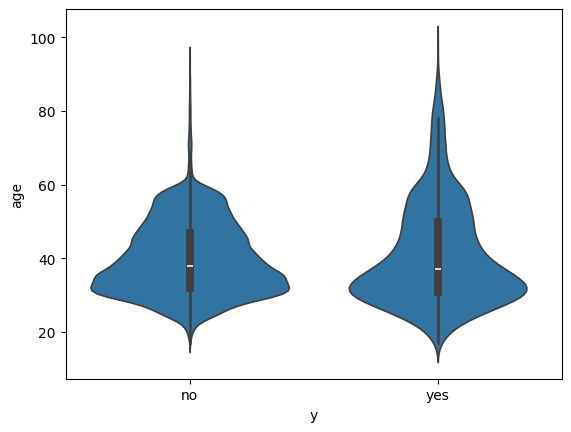

In [88]:
#violin plot for age
sns.violinplot(x="y", y="age", data=df)
plt.show()

In [89]:
df.shape

(41188, 21)

In [90]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

<AxesSubplot: xlabel='y', ylabel='count'>

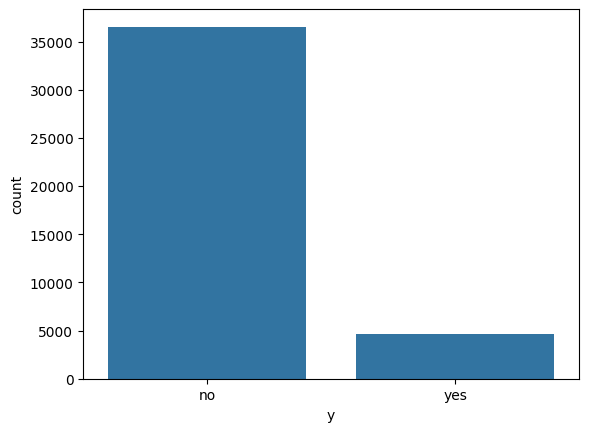

In [91]:
#the dataset is fairly balanced
#the data looked unbalanced
sns.countplot(data=df,x=df['y'])

In [92]:
df["poutcome"].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

<AxesSubplot: xlabel='poutcome'>

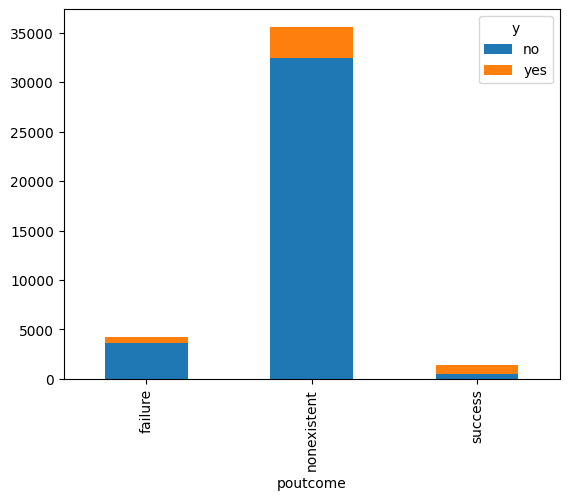

In [93]:
# bar chart for poutcome
types = df.groupby("poutcome")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot: xlabel='job'>

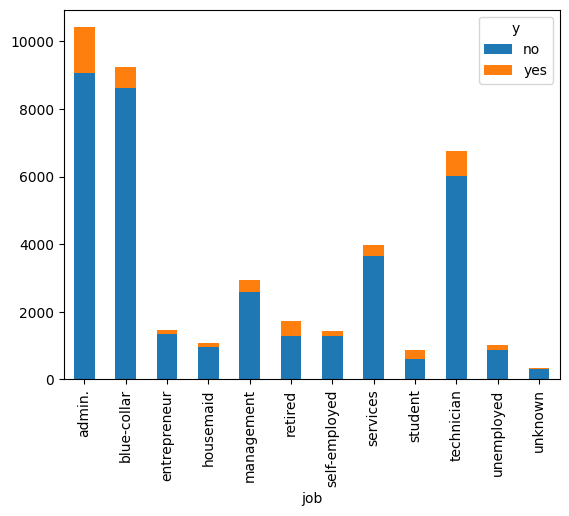

In [94]:
# group by job to display bar chart
types = df.groupby("job")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [95]:
df["education"].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

<AxesSubplot: xlabel='education'>

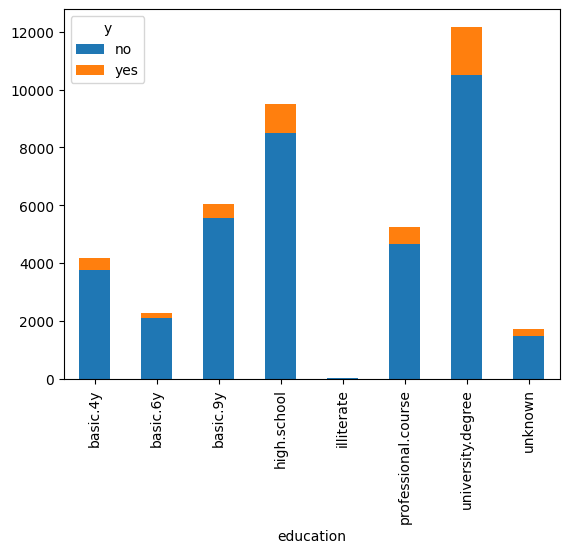

In [96]:
# group by education to display bar chart
types = df.groupby("education")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

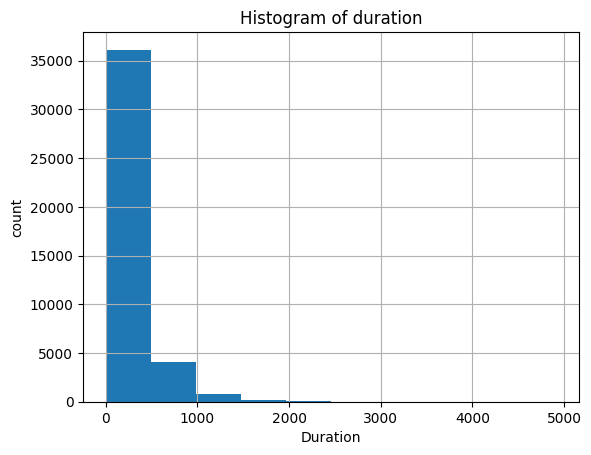

In [97]:
#Histogram of duration
df['duration'].hist()
plt.title('Histogram of duration')
plt.ylabel('count')
plt.xlabel('Duration')
plt.show()

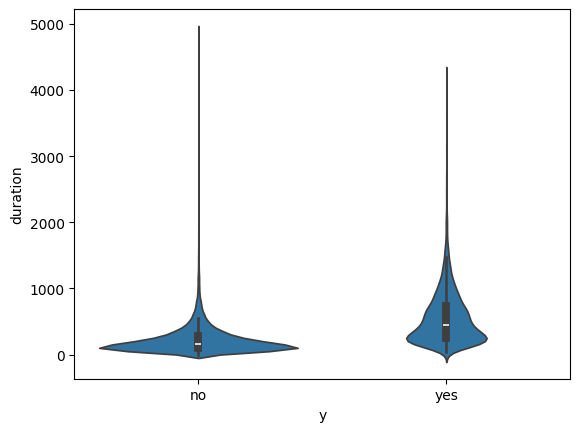

In [98]:
sns.violinplot(x="y", y="duration", data=df)
plt.show()

In [99]:
# replacing yes and no from deposit column by 1 and 0 to convert categorical feature to numerical feature
df['y'].replace(to_replace='yes', value=1, inplace=True)
df['y'].replace(to_replace='no',  value=0, inplace=True)
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [100]:
# replacing yes and no from deposit column by 1 and 0 to convert categorical feature to numerical feature
df['loan'].replace(to_replace='yes', value=1, inplace=True)
df['loan'].replace(to_replace='no',  value=0, inplace=True)
df['loan'].head()

0    0
1    0
2    0
3    0
4    1
Name: loan, dtype: object

In [101]:
# replacing yes and no from default column by 1 and 0 to convert categorical feature to numerical feature
df = df[df['default'] != 'unknown']
df['default'].replace(to_replace='no', value=1, inplace=True)
df['default'].replace(to_replace='yes',  value=0, inplace=True)
df['default'].head()

0    1
2    1
3    1
4    1
6    1
Name: default, dtype: int64

In [102]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32591 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32591 non-null  int64  
 1   job             32591 non-null  object 
 2   marital         32591 non-null  object 
 3   education       32591 non-null  object 
 4   default         32591 non-null  int64  
 5   housing         32591 non-null  object 
 6   loan            32591 non-null  object 
 7   contact         32591 non-null  object 
 8   month           32591 non-null  object 
 9   day_of_week     32591 non-null  object 
 10  duration        32591 non-null  int64  
 11  campaign        32591 non-null  int64  
 12  pdays           32591 non-null  int64  
 13  previous        32591 non-null  int64  
 14  poutcome        32591 non-null  object 
 15  emp.var.rate    32591 non-null  float64
 16  cons.price.idx  32591 non-null  float64
 17  cons.conf.idx   32591 non-null  floa

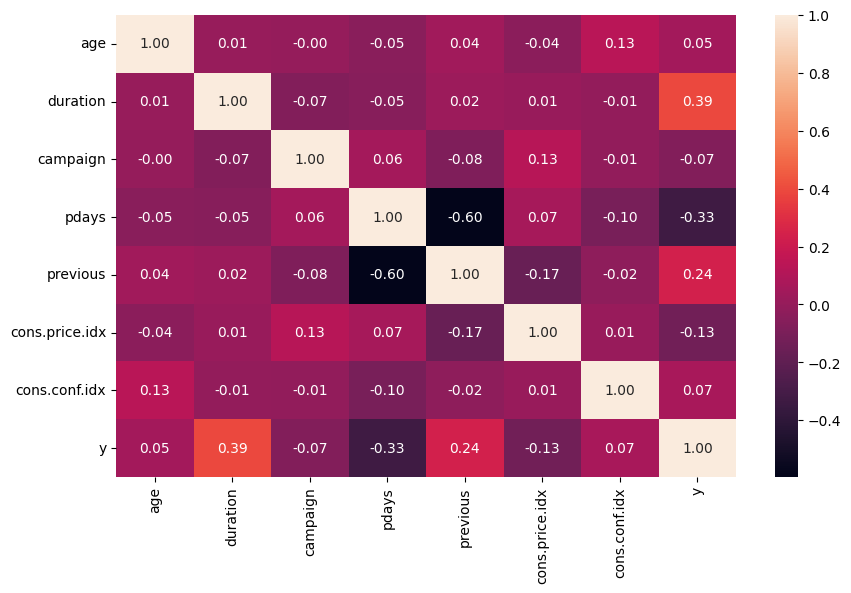

In [144]:
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64']).columns
numeric_df = df.drop(columns=non_numeric_cols)
corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()


In [104]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [111]:
# Label Encoding for 'education'
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df.head()

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,5,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [128]:
#spliting the data
x=df.drop('y',axis=1)
y=df['y']

In [129]:
print(x)
print(y)

       age  education  duration  campaign  pdays  previous  cons.price.idx  \
0       56          0       261         1    999         0          93.994   
2       37          3       226         1    999         0          93.994   
3       40          1       151         1    999         0          93.994   
4       56          3       307         1    999         0          93.994   
6       59          5       139         1    999         0          93.994   
...    ...        ...       ...       ...    ...       ...             ...   
41183   73          5       334         1    999         0          94.767   
41184   46          5       383         1    999         0          94.767   
41185   56          6       189         2    999         0          94.767   
41186   44          5       442         1    999         0          94.767   
41187   74          5       239         3    999         1          94.767   

       cons.conf.idx  
0              -36.4  
2              -3

In [136]:
#scalling x vallues
sd_scaller=StandardScaler()
x=sd_scaller.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [143]:
# Define a function to create the neural network model
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(256, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Assuming input shape is (time_steps, features)
input_shape = X_train.shape[1:]

# Create and compile the model
model = create_model(input_shape)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=25,  # You can adjust the maximum number of epochs
    batch_size=64,
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]  # Add the early stopping callback
)

# Evaluate on training data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f'Training Loss: {train_loss}')
print(f'Training Accuracy: {train_acc}')

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

Epoch 1/25
357/357 [==============================] - 3s 4ms/step - loss: 0.3235 - accuracy: 0.8737 - val_loss: 0.2554 - val_accuracy: 0.8900
Epoch 2/25
357/357 [==============================] - 2s 6ms/step - loss: 0.2782 - accuracy: 0.8845 - val_loss: 0.2508 - val_accuracy: 0.8857
Epoch 3/25
357/357 [==============================] - 2s 5ms/step - loss: 0.2701 - accuracy: 0.8839 - val_loss: 0.2476 - val_accuracy: 0.8867
Epoch 4/25
357/357 [==============================] - 1s 4ms/step - loss: 0.2642 - accuracy: 0.8861 - val_loss: 0.2458 - val_accuracy: 0.8882
Epoch 5/25
357/357 [==============================] - 1s 4ms/step - loss: 0.2602 - accuracy: 0.8891 - val_loss: 0.2346 - val_accuracy: 0.8936
Epoch 6/25
357/357 [==============================] - 1s 4ms/step - loss: 0.2576 - accuracy: 0.8883 - val_loss: 0.2404 - val_accuracy: 0.8908
Epoch 7/25
357/357 [==============================] - 1s 4ms/step - loss: 0.2566 - accuracy: 0.8869 - val_loss: 0.2373 - val_accuracy: 0.8918
Epoch 